In [91]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Desktop/Continuous MPS/MatrixProductBP.jl`


In [92]:
using Revise
using TensorTrains, TensorCast, Tullio, Random, IterTools, Plots, JLD2
using MatrixProductBP

In [93]:
tail = 1
head = 5
time = 3
filename = "m_$tail-$head fourier.jld2"
data = load(filename)

Py_basis = data["conv_μ_notj"]

FourierTensorTrain{Float64, 4}(OffsetArrays.OffsetArray{ComplexF64, 4, Array{ComplexF64, 4}}[[-5.029780634401383e-9 - 1.8771854001057343e-8im -1.7975654753203353e-8 - 7.38627331641563e-9im -0.00039153586087251773 + 0.0001415283421465897im -0.00019155709623595402 + 3.652844455660926e-5im;;; -1.0131145806011049e-8 + 2.659559603986302e-8im 1.5000857060933354e-8 + 2.4185535738769454e-8im -9.086272221606051e-5 + 7.347538487500757e-5im 0.0005124096207223517 + 0.0007151337424056155im;;; 3.102792781748066e-8 - 2.0378594939447894e-8im 2.6162474690020637e-9 - 3.702937598070585e-8im 5.2741802883090885e-5 - 4.410236502550272e-5im 0.00012676546319847823 + 0.0001905265319376553im;;; … ;;; 3.10279278174167e-8 + 2.037859493941145e-8im 3.502128660544178e-8 - 1.2309708398114085e-8im -2.598751410180813e-5 - 1.4240270435947975e-6im -3.5089894772503814e-5 + 9.185796037576669e-6im;;; -1.0131145805948095e-8 - 2.6595596039835227e-8im -2.729015151398044e-8 - 8.075486016345941e-9im 9.02016224472785e-6 - 9.91985

In [94]:
marg_basis = marginals(Py_basis |> marginalize,2.0)
Pyt_basis = marg_basis[time]

#245 (generic function with 1 method)

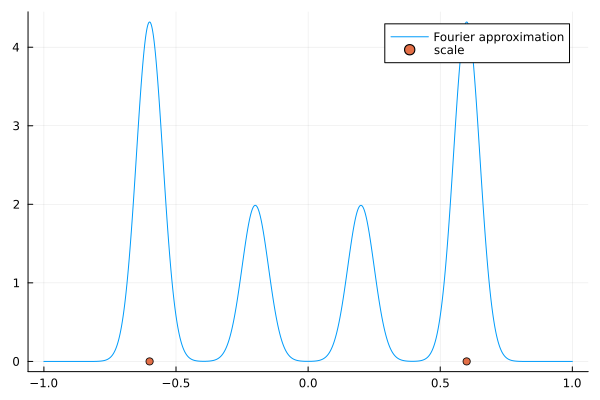

In [95]:
xplot = collect(-1:0.001:1)
yplot = Pyt_basis.(xplot)
plot(xplot, yplot, label="Fourier approximation")
scatter!([-3/5,3/5],[0,0], label="scale")